In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

In [2]:

data = pd.read_csv('billionares.csv')
data.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,Table2.Country Time Required to Start a Business,"Table1.Country % Reaching grade 5 , male","Table1.Country % Reaching grade 5, female","Table1.Country % Reaching last grade of primary education, male","Table1.Country % Reaching last grade of primary education, female"
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,24.2,60.7,67059887.0,46.227638,2.213749,4.0,NaN,NaN,NaN,NaN
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN


In [3]:
data['category']=data['category'].astype('category')
data['industries']=data['industries'].astype('category')

cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data = data.select_dtypes(include=[np.number])

# data = data[['Severity', 'Distance', 'Temperature', 'Humidity', 'Pressure', 'Visibility', 'WindSpeed', 'Precipitation']]
data.drop([ 'latitude_country', 'longitude_country','rank','finalWorth','population_country','gdp_country', 'birthDay', 'birthMonth', 'birthYear'], axis=1, inplace=True)
data.head()

,category,age,industries,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,Table2.Country Time Required to Start a Business,"Table1.Country % Reaching grade 5 , male","Table1.Country % Reaching grade 5, female","Table1.Country % Reaching last grade of primary education, male","Table1.Country % Reaching last grade of primary education, female"
0,4,74.0,4,110.05,1.1,65.6,102.5,82.5,24.2,60.7,4.0,NaN,NaN,NaN,NaN
1,0,51.0,0,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,NaN,NaN
2,16,59.0,16,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,NaN,NaN
3,16,78.0,16,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,NaN,NaN
4,5,92.0,5,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,NaN,NaN


In [10]:

data.fillna(method='bfill', inplace=True)
data.fillna(method='ffill', inplace=True)
data.fillna(0)
# data.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
data.head()



C:\Users\!ssemerkant\AppData\Local\Temp\ipykernel_39576\1929370052.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
C:\Users\!ssemerkant\AppData\Local\Temp\ipykernel_39576\1929370052.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,category,age,industries,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,Table2.Country Time Required to Start a Business,"Table1.Country % Reaching grade 5 , male","Table1.Country % Reaching grade 5, female","Table1.Country % Reaching last grade of primary education, male","Table1.Country % Reaching last grade of primary education, female"
0,4,74.0,4,110.05,1.1,65.6,102.5,82.5,24.2,60.7,4.0,96.0,91.0,98.0,98.0
1,0,51.0,0,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,98.0,98.0
2,16,59.0,16,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,98.0,98.0
3,16,78.0,16,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,98.0,98.0
4,5,92.0,5,117.24,7.5,88.2,101.8,78.5,9.6,36.6,4.2,96.0,91.0,98.0,98.0


In [11]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
# data_scaled.head()

In [12]:
data_dissimilarity = pairwise_distances(data_scaled, metric='euclidean')

print(data_dissimilarity[:5, :5])

[[0.         4.63102894 5.58136124 5.47423024 4.3526418 ]
 [4.63102894 0.         4.81856118 5.19490773 3.42902195]
 [5.58136124 4.81856118 0.         1.43030623 4.11998639]
 [5.47423024 5.19490773 1.43030623 0.         3.45162054]
 [4.3526418  3.42902195 4.11998639 3.45162054 0.        ]]


In [15]:
variables_dissimilarity = 1 - np.abs(data.corr())

print(variables_dissimilarity)

                                                    category       age  \
category                                            0.000000  0.854304   
age                                                 0.854304  0.000000   
industries                                          0.000000  0.854304   
cpi_country                                         0.923562  0.987797   
cpi_change_country                                  0.965966  0.900696   
gross_tertiary_education_enrollment                 0.908515  0.937324   
gross_primary_education_enrollment_country          0.902740  0.929320   
life_expectancy_country                             0.976936  0.979765   
tax_revenue_country_country                         0.886835  0.998460   
total_tax_rate_country                              0.995481  0.849526   
Table2.Country Time Required to Start  a Business   0.890872  0.994969   
Table1.Country % Reaching grade 5 , male            0.999851  0.860927   
Table1.Country % Reaching grade 5, fem

In [16]:
mds_data = MDS(n_components=2, dissimilarity='precomputed')
data_mds_result = mds_data.fit_transform(data_dissimilarity)

print(data_mds_result[:5])

[[-3.89795908 -0.04276187]
 [-3.18036755  1.68486094]
 [ 0.5399379   3.34471174]
 [ 0.05864406  3.58104365]
 [-2.43086012  2.47013525]]


C:\Users\!ssemerkant\AppData\Local\Temp\ipykernel_39576\815925635.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_mds_result[:, 0], data_mds_result[:, 1], cmap='viridis')


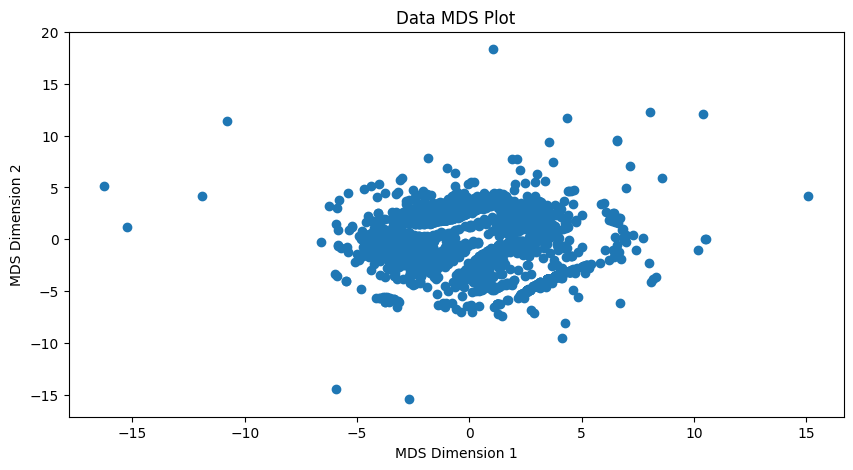

In [22]:
plt.figure(figsize=(10, 5))
plt.scatter(data_mds_result[:, 0], data_mds_result[:, 1], cmap='viridis')
plt.title('Data MDS Plot')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.show()

In [19]:
mds_variables = MDS(n_components=2, dissimilarity='precomputed')
variables_mds_result = mds_variables.fit_transform(variables_dissimilarity)

print(variables_mds_result[:5])

[[-0.34949255 -0.56602516]
 [ 0.04432518 -0.66192084]
 [-0.34950758 -0.56601839]
 [ 0.15410046  0.54899649]
 [-0.6004509   0.20392711]]


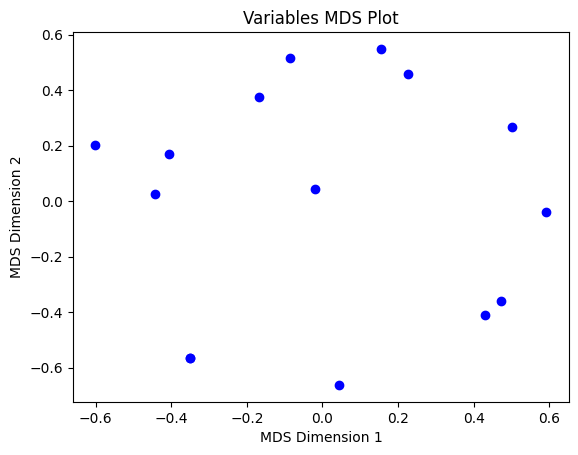

In [23]:

plt.scatter(variables_mds_result[:, 0], variables_mds_result[:, 1], c='blue')
plt.title('Variables MDS Plot')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.show()